In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Expression of MTUS1 Transcripts by Cancer Type

## 1. CCLE Cell Line Annotations

We use the file `Cell_lines_annotations_20181226.txt`, which contains metadata for CCLE cell lines, including:

- `CCLE_ID`: internal CCLE cell line name
- `depMapID`: DepMap universal identifier
- `Name`: readable cell line name
- `Pathology`, `tcga_code`, `lineage`, `type`: cancer classification information

This file was downloaded from the [Broad Institute's CCLE Data Portal](https://sites.broadinstitute.org/ccle/data) (2018 release).

You can access the updated CCLE cell line annotations through DepMap's download page:  
👉 [https://depmap.org/portal/download/](https://depmap.org/portal/download/)

We use this metadata to link expression, mutation, and drug response data across datasets.


In [3]:
# Load cell line annotations from CCLE (December 2018 release)
meta_CCLE = pd.read_csv("../data/Cell-lines/Cell_lines_annotations_20181226.txt", sep='\t')

# Display available column names for inspection
print(meta_CCLE.columns)
meta_CCLE.head()


Index(['CCLE_ID', 'depMapID', 'Name', 'Pathology', 'Site_Primary',
       'Site_Subtype1', 'Site_Subtype2', 'Site_Subtype3', 'Histology',
       'Hist_Subtype1', 'Hist_Subtype2', 'Hist_Subtype3', 'Gender',
       'Life_Stage', 'Age', 'Race', 'Geo_Loc', 'inferred_ethnicity',
       'Site_Of_Finding', 'Disease', 'Annotation_Source',
       'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium',
       'Supplements', 'Freezing.Medium', 'Doubling.Time.from.Vendor',
       'Doubling.Time.Calculated.hrs', 'type', 'type_refined',
       'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code'],
      dtype='object')


,CCLE_ID,depMapID,Name,Pathology,Site_Primary,Site_Subtype1,Site_Subtype2,Site_Subtype3,Histology,Hist_Subtype1,...,Growth.Medium,Supplements,Freezing.Medium,Doubling.Time.from.Vendor,Doubling.Time.Calculated.hrs,type,type_refined,PATHOLOGIST_ANNOTATION,mutRate,tcga_code
0,DMS53_LUNG,ACH-000698,DMS 53,primary,lung,NS,NS,NS,carcinoma,small_cell_carcinoma,...,Waymouth's +10%FBS,NaN,5%DMSO,NaN,450.0,lung_small_cell,lung_small_cell,Lung:SCLC,157.241638,SCLC
1,SW1116_LARGE_INTESTINE,ACH-000489,SW1116,primary,large_intestine,colon,NS,NS,carcinoma,adenocarcinoma,...,L15+10%FBS,NaN,5%DMSO,NaN,123.2,colorectal,colorectal,Colorectal:Carcinoma,94.373192,COAD/READ
2,NCIH1694_LUNG,ACH-000431,NCI-H1694,metastasis,lung,NS,NS,NS,carcinoma,small_cell_carcinoma,...,DMEM:F12 (1:1) + 5% FBS,".005 mg/ml insulin, .01 mg/ml transferrin, 30n...",5% DMSO,NaN,81.2,lung_small_cell,lung_small_cell,Lung:SCLC,109.534987,SCLC
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000707,P3HR-1,metastasis,haematopoietic_and_lymphoid_tissue,NS,NS,NS,lymphoid_neoplasm,Burkitt_lymphoma,...,NaN,NaN,NaN,NaN,NaN,lymphoma_Burkitt,lymphoma_Burkitt,Lymphoma:NH_B_cell,166.456406,DLBC
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000509,HuT 78,primary,haematopoietic_and_lymphoid_tissue,skin,NS,NS,lymphoid_neoplasm,mycosis_fungoides-Sezary_syndrome,...,NaN,NaN,NaN,NaN,NaN,lymphoma_other,T-cell_lymphoma_other,Lymphoma:NH_T_cell,118.217569,NaN


## 2. RNA-seq Transcript-Level Expression (CCLE, September 2018)

We use the file `CCLE_RNAseq_rsem_transcripts_tpm_20180929.txt`, which contains transcript-level RNA-seq expression data  
(log-transformed TPM values using RSEM) for CCLE cell lines.

- Each row represents a transcript (with `gene_id` and transcript ID as columns)
- Columns correspond to CCLE cell lines (`CCLE_ID`) and contain expression values (log2(TPM + 1))
- This dataset allows isoform-specific analysis of genes such as **MTUS1** (e.g., ATIP3, ATIP1, etc.)

🔗 **Original source**:  
[https://depmap.org/portal/download/](https://depmap.org/portal/download/) : *"Transcript expression (RSEM, transcript level)"*
**File to be downloaded**


In [14]:
# Load RNA-seq transcript-level expression data (TPM) for CCLE (dated 2018-09-29)
df_t = pd.read_csv("../data/Cell-lines/CCLE_RNAseq_rsem_transcripts_tpm_20180929.txt", sep='\t')
df_t.head()


,gene_id,transcript_id,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
0,ENSG00000000003.10,ENST00000373020.4,4.50,6.72,20.94,21.68,22.18,55.20,14.99,30.28,...,0.47,48.71,14.11,24.13,20.94,45.40,28.60,56.54,7.89,16.03
1,ENSG00000000003.10,ENST00000494424.1,0.29,0.12,0.58,0.74,0.28,0.47,0.22,0.09,...,0.28,0.45,0.00,0.00,0.00,1.11,0.00,1.99,0.00,0.19
2,ENSG00000000003.10,ENST00000496771.1,0.49,0.16,1.28,0.46,0.63,2.27,1.10,1.65,...,0.00,1.14,0.07,0.00,0.00,1.45,0.32,2.55,0.23,0.60
3,ENSG00000000005.5,ENST00000373031.4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ENSG00000000005.5,ENST00000485971.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## 3. MTUS1/ATIP3


**Reference transcript (MTUS1 / ATIP3):**  
- Ensembl transcript: [ENST00000262102.10](https://www.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000129422;r=8:17643795-17801094;t=ENST00000262102)  
- UniProt entry: [Q9ULD2 (ATIP3)](https://www.uniprot.org/uniprotkb/Q9ULD2/entry#Q9ULD2-1)  
- This gene produces 7 isoforms via **alternative splicing** (ATIP1 to ATIP4, including ATIP3a and ATIP3b).

**Example isoforms of MTUS1 / ATIP variants:**

| Transcript ID       | Name       | bp (length) | Protein (aa) | Biotype         | CCDS     | UniProt   | Synonym | ID in file           |
|---------------------|------------|-------------|---------------|------------------|----------|-----------|---------|-----------------------|
| ENST00000262102.10  | MTUS1-201  | 6160        | 1270 aa       | Protein coding   | CCDS43717| Q9ULD2-1  | ATIP3a  | ENST00000262102.6     |
| ENST00000297488.10  | MTUS1-202  | 3731        | 436 aa        | Protein coding   | CCDS43719| Q9ULD2-3  | ATIP1   | ENST00000297488.6     |
| ENST00000381861.7   | MTUS1-203  | 3996        | 517 aa        | Protein coding   | CCDS43718| Q9ULD2-6  | ATIP4   | ENST00000381861.3     |
| ENST00000381869.5   | MTUS1-204  | 6256        | 1216 aa       | Protein coding   | CCDS43716| Q9ULD2-2  | ATIP3b  | ENST00000381869.3     |

> **Note:** ATIP2 is expressed at very low levels in most tissues.

**Gene-level note:**  
According to the GENCODE V47 annotation, the current stable Ensembl ID for **MTUS1** is `ENSG00000129422.9`  
(not `.15`, as sometimes found in older versions).  
The canonical transcript **ENST00000262102.6** (a prior version of `.10`) corresponds to **ATIP3**, which encodes a 1270-aa protein.


ENST00000262102.6  (ENST00000262102.10) from GENCODE V47  / 1270 aa / ATIP3

In [15]:
# According to GENCODE (V47), the gene ID for MTUS1 is 'ENSG00000129422.9'
# This ensures compatibility between transcript annotations and this dataset

# Check if the MTUS1 gene is present in the dataset
print('ENSG00000129422.9' in df_t['gene_id'].to_list())

# Filter and display all transcript-level entries for MTUS1
df_t[df_t['gene_id'] == 'ENSG00000129422.9'].head(5)

True


,gene_id,transcript_id,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
54708,ENSG00000129422.9,ENST00000262102.6,7.30,9.79,0.03,0.00,0.09,1.9,0.63,0.47,...,0.00,6.3,3.37,0.52,1.27,3.52,0.00,0.53,4.78,4.37
54709,ENSG00000129422.9,ENST00000297488.6,0.09,0.00,0.00,0.00,0.00,0.1,0.00,0.04,...,0.00,0.0,0.09,0.00,0.00,0.00,0.73,0.27,0.08,0.08
54710,ENSG00000129422.9,ENST00000381861.3,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54711,ENSG00000129422.9,ENST00000381862.3,0.00,0.00,0.00,0.04,0.00,0.0,0.00,0.00,...,0.01,0.9,0.00,0.25,0.00,0.36,0.16,0.06,0.00,0.09
54712,ENSG00000129422.9,ENST00000381869.3,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
# Filter the DataFrame to keep only entries for the MTUS1 gene
df_t = df_t[df_t['gene_id'] == 'ENSG00000129422.9']
df_t = df_t.drop(columns='gene_id')
df_t.index = df_t['transcript_id']
df_t =df_t.drop(columns='transcript_id')
df_t =df_t.T 
df_t

transcript_id,ENST00000262102.6,ENST00000297488.6,ENST00000381861.3,ENST00000381862.3,ENST00000381869.3,ENST00000400046.1,ENST00000517413.1,ENST00000517721.1,ENST00000517818.1,ENST00000518138.1,...,ENST00000521772.1,ENST00000521882.1,ENST00000522149.1,ENST00000522757.1,ENST00000523183.1,ENST00000523471.1,ENST00000523718.1,ENST00000524044.1,ENST00000524371.1,ENST00000544260.1
22RV1_PROSTATE,7.30,0.09,0.0,0.00,0.0,10.78,0.91,0.0,0.0,0.03,...,0.00,0.0,0.0,0.00,0.00,1.48,0.06,0.00,0.38,0.00
2313287_STOMACH,9.79,0.00,0.0,0.00,0.0,17.23,1.56,0.0,0.0,0.00,...,0.00,0.0,0.0,0.00,0.00,1.40,0.13,0.00,0.00,0.00
253JBV_URINARY_TRACT,0.03,0.00,0.0,0.00,0.0,0.01,0.00,0.0,0.0,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
253J_URINARY_TRACT,0.00,0.00,0.0,0.04,0.0,0.07,0.00,0.0,0.0,0.05,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.09,0.00,0.0,0.00,0.0,0.37,0.01,0.0,0.0,0.28,...,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YD8_UPPER_AERODIGESTIVE_TRACT,3.52,0.00,0.0,0.36,0.0,7.16,0.64,0.0,0.0,3.18,...,0.17,0.0,0.0,0.00,0.00,0.23,0.00,0.00,2.46,0.19
YH13_CENTRAL_NERVOUS_SYSTEM,0.00,0.73,0.0,0.16,0.0,0.00,0.03,0.0,0.0,0.00,...,0.00,0.0,0.0,1.95,0.00,0.11,0.00,0.00,0.00,0.00
YKG1_CENTRAL_NERVOUS_SYSTEM,0.53,0.27,0.0,0.06,0.0,1.97,0.08,0.0,0.0,0.00,...,0.00,0.0,0.0,0.00,0.07,0.10,0.00,0.00,0.00,0.00
ZR751_BREAST,4.78,0.08,0.0,0.00,0.0,11.40,0.87,0.0,0.0,0.00,...,0.00,0.0,0.0,0.00,0.00,1.87,0.00,0.27,5.73,0.00


In [6]:
# Rename the index to 'CCLE_ID' for clarity
df_t.index.name = 'CCLE_ID'
df_t = df_t.merge(meta_CCLE,  on='CCLE_ID')
df_t[df_t['tcga_code'] == 'BRCA'].head()

,CCLE_ID,ENST00000262102.6,ENST00000297488.6,ENST00000381861.3,ENST00000381862.3,ENST00000381869.3,ENST00000400046.1,ENST00000517413.1,ENST00000517721.1,ENST00000517818.1,...,Growth.Medium,Supplements,Freezing.Medium,Doubling.Time.from.Vendor,Doubling.Time.Calculated.hrs,type,type_refined,PATHOLOGIST_ANNOTATION,mutRate,tcga_code
40,AU565_BREAST,4.79,0.04,0.0,0.00,0.00,13.68,0.91,0.07,0.0,...,RPMI 1640 + 10%FBS,NaN,5% DMSO,NaN,74.1,breast,breast,Breast:Carcinoma,223.382430,BRCA
59,BT20_BREAST,1.28,0.00,0.0,0.06,0.00,6.65,0.42,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,breast,breast,Breast:Carcinoma,114.140088,BRCA
60,BT474_BREAST,3.07,0.00,0.0,0.00,0.19,11.48,0.68,0.11,0.0,...,NaN,NaN,NaN,NaN,NaN,breast,breast,Breast:Carcinoma,359.640912,BRCA
61,BT483_BREAST,2.27,0.00,0.0,0.07,0.00,5.61,0.40,0.00,0.0,...,RPMI-1640 + 20% FBS,0.01 mg/ml bovine insulin,5%DMSO,NaN,206.3,breast,breast,Breast:Carcinoma,178.189732,BRCA
62,BT549_BREAST,0.00,0.04,0.0,0.02,0.00,0.01,0.00,0.00,0.0,...,RPMI + 10 % FBS,NaN,5%DMSO,NaN,98.4,breast,breast,NaN,100.467969,BRCA


## 4. Expression of MTUS1 Transcripts by Cancer Type

To visualize the transcript-level expression of MTUS1 isoforms (e.g., ATIP1, ATIP3a, ATIP3b, ATIP4), we:

- Select transcript IDs based on a predefined `transcript_mapping` dictionary
- Filter the RNA-seq dataset by TCGA tissue code (e.g., `OV`, `BRCA`, `LIHC`, etc.)
- Reshape the dataset to long format for plotting
- Map each transcript ID back to its ATIP isoform name
- Display a boxplot of transcript expression (log2(TPM + 1)) across all cell lines of the selected cancer type

This visualization helps compare the relative abundance of different MTUS1 isoforms within a specific cancer context.


In [7]:
# Create a mapping for transcript IDs to their corresponding ENST IDs
transcript_mapping = {'ATIP3a':'ENST00000262102.6','ATIP1':'ENST00000297488.6','ATIP4':'ENST00000381861.3','ATIP3b':'ENST00000381869.3'}
df_t[['ENST00000262102.6']].max(), df_t[['ENST00000381869.3']].max(), df_t[['ENST00000297488.6']].max(), 

(ENST00000262102.6    25.52
 dtype: float64,
 ENST00000381869.3    0.52
 dtype: float64,
 ENST00000297488.6    96.91
 dtype: float64)

Number of cell lines: 51


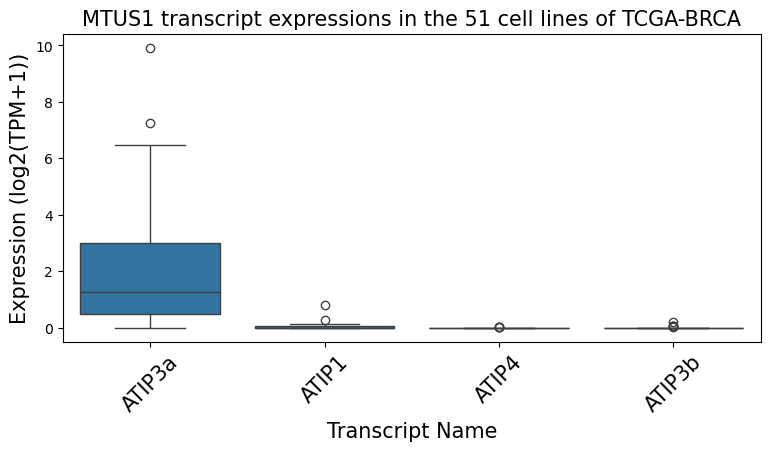

In [13]:
# Create a list of selected transcript IDs (e.g., for MTUS1 isoforms)
selected_transcripts = list(transcript_mapping.values())

# Set the TCGA tissue code to filter cell lines (e.g., 'OV', 'BRCA','GBM','SKCM' etc.)
name_TCGA = 'BRCA'  # 'BRCA', 'LIHC', 'PRAD', 'STAD' can be used as alternatives

# Filter RNA-seq data for the selected cancer type
df_2 = df_t[df_t['tcga_code'] == name_TCGA]
print("Number of cell lines:", df_2.shape[0])

# Reshape the DataFrame to long format for plotting
df_long = df_2.melt(
    id_vars=['CCLE_ID'], 
    value_vars=selected_transcripts,
    var_name='transcript_id', 
    value_name='expression'
)

# Map transcript IDs back to transcript names using the reverse of transcript_mapping
reverse_mapping = {v: k for k, v in transcript_mapping.items()}
df_long['transcript_name'] = df_long['transcript_id'].map(reverse_mapping)

# Keep only the rows corresponding to selected transcript names
df_filtered = df_long[df_long['transcript_name'].isin(transcript_mapping.keys())]

# Plot the expression values using a boxplot
plt.figure(figsize=(9, 4))
sns.boxplot(x='transcript_name', y='expression', data=df_filtered)
plt.title(f'MTUS1 transcript expressions in the {df_2.shape[0]} cell lines of TCGA-{name_TCGA}', size=15)
plt.xlabel('Transcript Name', size=15)
plt.ylabel('Expression (log2(TPM+1))', size=15)
#plt.ylim(0, 10)
plt.xticks(rotation=45, size=15)
plt.show()

Number of cell lines: 54


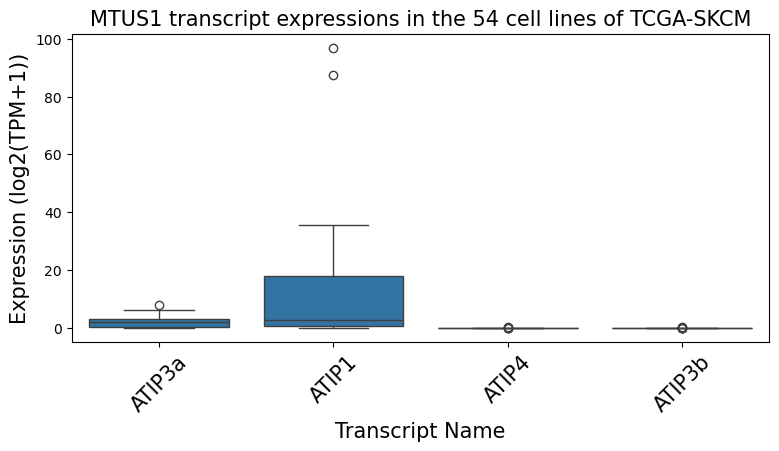

In [12]:
# Create a list of selected transcript IDs (e.g., for MTUS1 isoforms)
selected_transcripts = list(transcript_mapping.values())

# Set the TCGA tissue code to filter cell lines (e.g., 'OV', 'BRCA','GBM','SKCM' etc.)
name_TCGA = 'SKCM'  # 'BRCA', 'LIHC', 'PRAD', 'STAD' can be used as alternatives

# Filter RNA-seq data for the selected cancer type
df_2 = df_t[df_t['tcga_code'] == name_TCGA]
print("Number of cell lines:", df_2.shape[0])

# Reshape the DataFrame to long format for plotting
df_long = df_2.melt(
    id_vars=['CCLE_ID'], 
    value_vars=selected_transcripts,
    var_name='transcript_id', 
    value_name='expression'
)

# Map transcript IDs back to transcript names using the reverse of transcript_mapping
reverse_mapping = {v: k for k, v in transcript_mapping.items()}
df_long['transcript_name'] = df_long['transcript_id'].map(reverse_mapping)

# Keep only the rows corresponding to selected transcript names
df_filtered = df_long[df_long['transcript_name'].isin(transcript_mapping.keys())]

# Plot the expression values using a boxplot
plt.figure(figsize=(9, 4))
sns.boxplot(x='transcript_name', y='expression', data=df_filtered)
plt.title(f'MTUS1 transcript expressions in the {df_2.shape[0]} cell lines of TCGA-{name_TCGA}', size=15)
plt.xlabel('Transcript Name', size=15)
plt.ylabel('Expression (log2(TPM+1))', size=15)
#plt.ylim(0, 10)
plt.xticks(rotation=45, size=15)
plt.show()
